Importing the necessary libraries.

In [150]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

Reading the data from a csv file into a pandas dataframe

In [151]:
diabetes = pd.read_csv('diabetes.csv')

In [152]:
diabetes.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [153]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Distribution of BMI

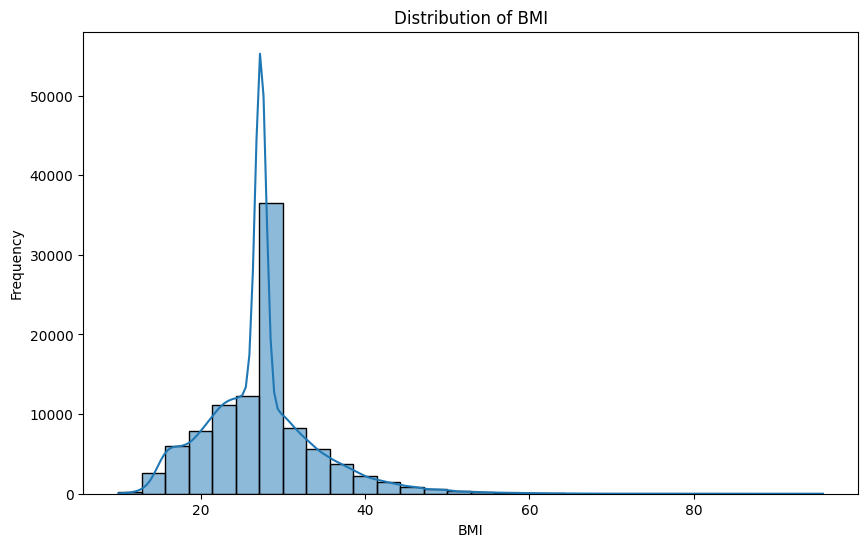

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization 1: Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(diabetes['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


Count Plot of Diabetes by Gender

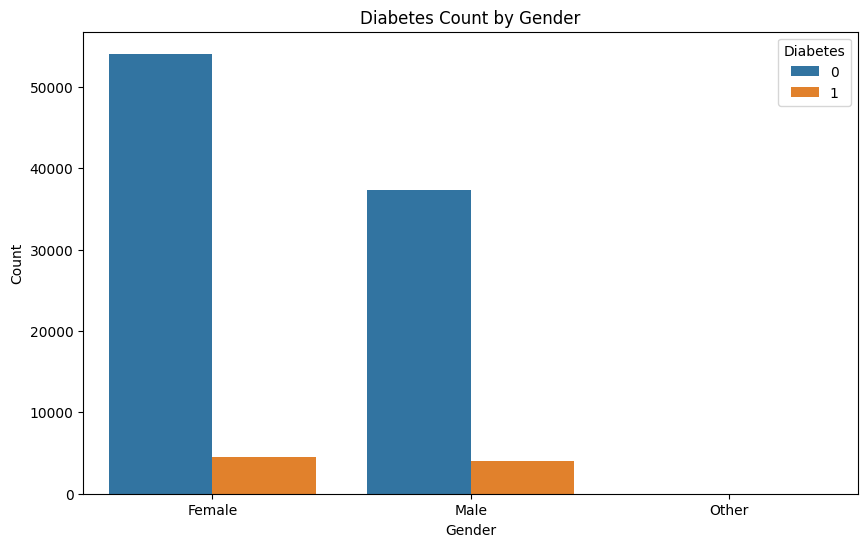

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetes, x='gender', hue='diabetes')
plt.title('Diabetes Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right')
plt.show()

Scatter plot of HbA1c level vs. Blood Glucose level colored by Diabetes

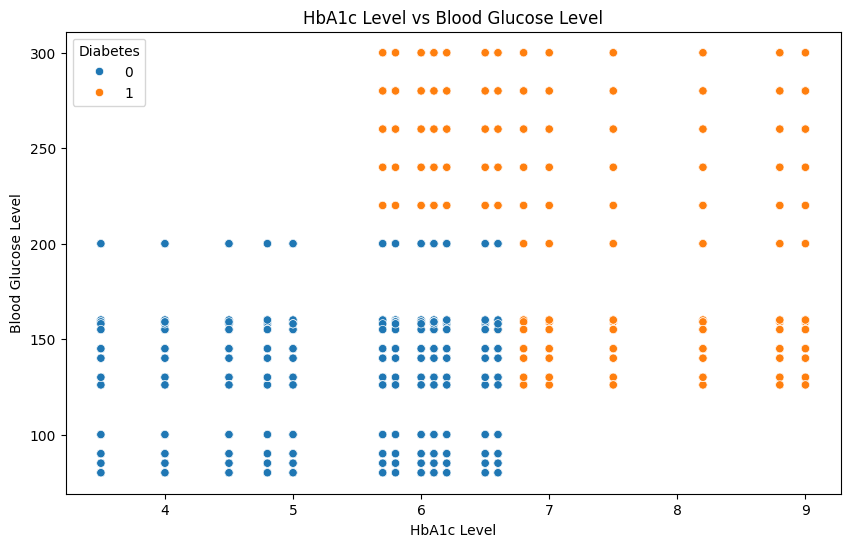

In [156]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes, x='HbA1c_level', y='blood_glucose_level', hue='diabetes')
plt.title('HbA1c Level vs Blood Glucose Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.legend(title='Diabetes', loc='upper left')
plt.show()

Separating features from the labels.

In [157]:
diabetes_sampled = diabetes.sample(n=10000, random_state=42)

# Verify the number of entries in the sampled DataFrame
print(diabetes_sampled.shape)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
diabetes_encoded = pd.get_dummies(diabetes_sampled, columns=['gender', 'smoking_history'], drop_first=False)

# Convert boolean columns to integers
boolean_columns = diabetes_encoded.select_dtypes(include=['bool']).columns
diabetes_encoded[boolean_columns] = diabetes_encoded[boolean_columns].astype(int)

# Ensure the column name is correct
if 'smoking_history_not current' in diabetes_encoded.columns:
    diabetes_encoded.rename(columns={'smoking_history_not current': 'smoking_history_not_current'}, inplace=True)

if 'smoking_history_No Info' in diabetes_encoded.columns:
    diabetes_encoded.rename(columns={'smoking_history_No Info': 'smoking_history_No_Info'}, inplace=True)


diabetes_encoded.head()

# Separate features (X) and target variable (y)
X = diabetes_encoded.drop(columns=['diabetes', 'smoking_history_No_Info'])
y = diabetes_encoded['diabetes']

X.head()

(10000, 9)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not_current
75721,13.0,0,0,20.82,5.8,126,1,0,0,0,0,0,0
80184,3.0,0,0,21.00,5.0,145,1,0,0,0,0,0,0
19864,63.0,0,0,25.32,3.5,200,0,1,0,0,1,0,0
76699,2.0,0,0,17.43,6.1,126,1,0,0,0,0,1,0
92991,33.0,0,0,40.08,6.2,200,1,0,0,0,0,0,1


Splitting the Dataset into Training and Test Sets, and standardizing the data.

In [158]:

# Divide data into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)



Fitting the models to the training dataset.

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

# Initialize SVM classifiers
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True, verbose=True)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True, verbose=True)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True, verbose=True)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True, verbose=True)



Performing 5-Fold Cross Validation for KNN, making predictions and generating classification report.

In [160]:


# Initialize KFold
k = 5
kf = KFold(n_splits=k)

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn_cv_scores = cross_val_score(knn, X_train, y_train.ravel(), cv=kf, scoring='accuracy', n_jobs=-1)
print(f'KNN Cross-Validation Scores: {knn_cv_scores}')
print(f'KNN Avg accuracy: {knn_cv_scores.mean()}')
knn.fit(X_train, y_train.ravel())
y_pred_knn = knn.predict(X_test)
print('KNN Classification Report:')
print(classification_report(y_test, y_pred_knn))

KNN Cross-Validation Scores: [0.94642857 0.94714286 0.95428571 0.94785714 0.93857143]
KNN Avg accuracy: 0.946857142857143
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2726
           1       0.81      0.43      0.57       274

    accuracy                           0.94      3000
   macro avg       0.88      0.71      0.77      3000
weighted avg       0.93      0.94      0.93      3000



Performing 5-Fold Cross Validation for GNB, making predictions and generating classification report.

In [161]:
gnb_cv_scores = cross_val_score(gnb, X_train, y_train.ravel(), cv=kf, scoring='accuracy', n_jobs=-1)
print(f'Naive Bayes Cross-Validation Scores: {gnb_cv_scores}')
print(f'Naive Bayes Avg accuracy: {gnb_cv_scores.mean()}')
gnb.fit(X_train, y_train.ravel())
y_pred_gnb = gnb.predict(X_test)
print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred_gnb))

Naive Bayes Cross-Validation Scores: [0.90071429 0.89142857 0.91928571 0.90214286 0.88428571]
Naive Bayes Avg accuracy: 0.8995714285714286
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2726
           1       0.45      0.63      0.53       274

    accuracy                           0.90      3000
   macro avg       0.71      0.78      0.74      3000
weighted avg       0.92      0.90      0.90      3000



Performing 5-fold Cross Validation on a Linear SVM, making predictions and generating classification report.

In [162]:
linear_cv_scores = cross_val_score(linear, X_train, y_train.ravel(), cv=kf, scoring='accuracy', n_jobs=-1)
print(f'SVM Linear Cross-Validation Scores: {linear_cv_scores}')
print(f'SVM Linear Avg accuracy: {linear_cv_scores.mean()}')
linear.fit(X_train, y_train.ravel())
y_pred_linear = linear.predict(X_test)
print('SVM Linear Classification Report:')
print(classification_report(y_test, y_pred_linear))

X_train.shape, X_test.shape


SVM Linear Cross-Validation Scores: [0.96357143 0.95785714 0.96928571 0.96       0.96071429]
SVM Linear Avg accuracy: 0.9622857142857143
[LibSVM]SVM Linear Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2726
           1       0.90      0.57      0.70       274

    accuracy                           0.95      3000
   macro avg       0.93      0.78      0.84      3000
weighted avg       0.95      0.95      0.95      3000



((7000, 13), (3000, 13))

Performing 5 Fold Cross Validation on a RBF SVM, making predictions and generating classification report.

In [163]:
rbf_cv_scores = cross_val_score(rbf, X_train, y_train.ravel(), cv=kf, scoring='accuracy', n_jobs=-1)
print(f'SVM RBF Cross-Validation Scores: {rbf_cv_scores}')
print(f'SVM RBF Avg accuracy: {rbf_cv_scores.mean()}')
rbf.fit(X_train, y_train.ravel())
y_pred_rbf = rbf.predict(X_test)
print('SVM RBF Classification Report:')
print(classification_report(y_test, y_pred_rbf))

SVM RBF Cross-Validation Scores: [0.915      0.91285714 0.925      0.91642857 0.90928571]
SVM RBF Avg accuracy: 0.9157142857142857
[LibSVM]SVM RBF Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2726
           1       1.00      0.00      0.01       274

    accuracy                           0.91      3000
   macro avg       0.95      0.50      0.48      3000
weighted avg       0.92      0.91      0.87      3000



Performing 5 fold Cross Validation on Poly SVM, making predictions and generating classification report.

In [164]:
poly_cv_scores = cross_val_score(poly, X_train, y_train.ravel(), cv=kf, scoring='accuracy', n_jobs=-1)
print(f'SVM Poly Cross-Validation Scores: {poly_cv_scores}')
print(f'SVM Poly Avg accuracy: {poly_cv_scores.mean()}')
poly.fit(X_train, y_train.ravel())
y_pred_poly = poly.predict(X_test)
print('SVM Poly Classification Report:')
print(classification_report(y_test, y_pred_poly))

SVM Poly Cross-Validation Scores: [0.94857143 0.94071429 0.95357143 0.94928571 0.94285714]
SVM Poly Avg accuracy: 0.9470000000000001
[LibSVM]SVM Poly Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2726
           1       0.99      0.35      0.51       274

    accuracy                           0.94      3000
   macro avg       0.96      0.67      0.74      3000
weighted avg       0.94      0.94      0.93      3000



Performing 5 Fold Cross Validation on Sigmoid SVM, making predictions and generating classification report.

In [165]:
sig_cv_scores = cross_val_score(sig, X_train, y_train.ravel(), cv=kf, scoring='accuracy', n_jobs=-1)
print(f'SVM Sigmoid Cross-Validation Scores: {sig_cv_scores}')
print(f'SVM Sigmoid Avg accuracy: {sig_cv_scores.mean()}')
sig.fit(X_train, y_train.ravel())
y_pred_sig = sig.predict(X_test[:1000])
print('SVM Sigmoid Classification Report:')
print(classification_report(y_test[:1000], y_pred_sig))


SVM Sigmoid Cross-Validation Scores: [0.9        0.89928571 0.905      0.90357143 0.89928571]
SVM Sigmoid Avg accuracy: 0.9014285714285715
[LibSVM]SVM Sigmoid Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       916
           1       0.00      0.00      0.00        84

    accuracy                           0.90      1000
   macro avg       0.46      0.49      0.47      1000
weighted avg       0.84      0.90      0.87      1000



Classification Metrics Graph

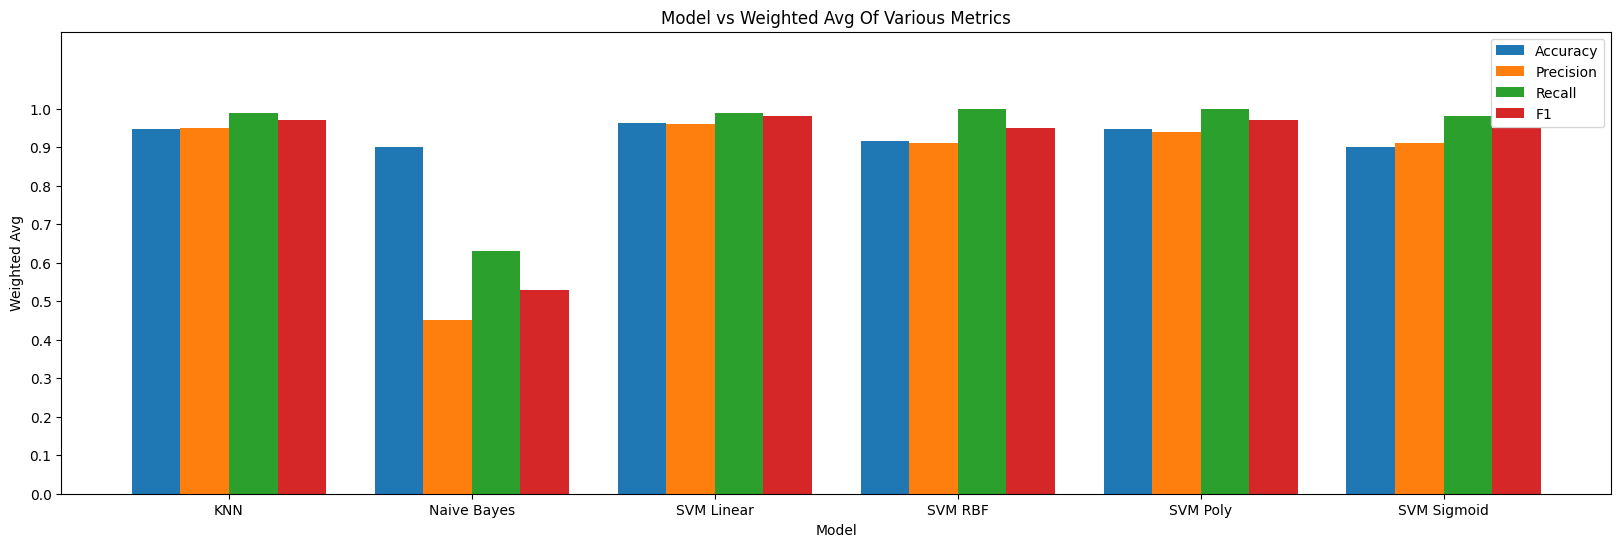

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Models
X = ['KNN', 'Naive Bayes', 'SVM Linear', 'SVM RBF', 'SVM Poly', 'SVM Sigmoid']

# Collect this information from the classification reports and store them in lists
accuracy = [0.9468571428571429, 0.8995714285714286, 0.9628571428571429, 0.9157142857142857, 0.9470000000000001, 0.9014285714285715]
precision = [0.95, 0.45, 0.96, 0.91, 0.94, 0.91]
recall = [0.99, 0.63, 0.99, 1.00, 1.00, 0.98]
f1 = [0.97, 0.53, 0.98, 0.95, 0.97, 0.95]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 6)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')
plt.ylim(0, 1.2)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()


In [167]:
import pickle

# Save the linear model to a file
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(linear, file)